### Gradient Descent code from scratch

In [3]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

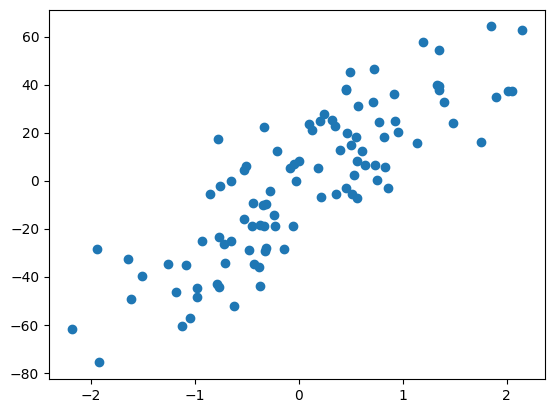

In [4]:
X,Y=make_regression(n_samples=100, n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)
plt.scatter(X,Y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=2)

In [6]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [7]:
Y_pred=lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.6345158782661012

In [19]:
class GDRegressor:

    def __init__(self,learning_rate,epochs):
        self.m=0
        self.b=120
        self.learnrate=learning_rate
        self.epochs=epochs

    def fit(self,X,Y):
        # try to find derivative first
        for i in range(self.epochs):
            loss_slope_b=-2 * np.sum(Y - (self.m*X.ravel()+ self.b))
            loss_slope_m=-2* np.sum(X.ravel()*(Y-(self.m*X.ravel()+self.b)))
            self.b=self.b-(self.learnrate*loss_slope_b)
            self.m=self.m-(self.learnrate*loss_slope_m)
            Y_pred=self.m*X.ravel()+self.b
            plt.plot(X,Y_pred)

    def predict(self,X):
        return self.m*X.ravel()+self.b



0.6345158782661012

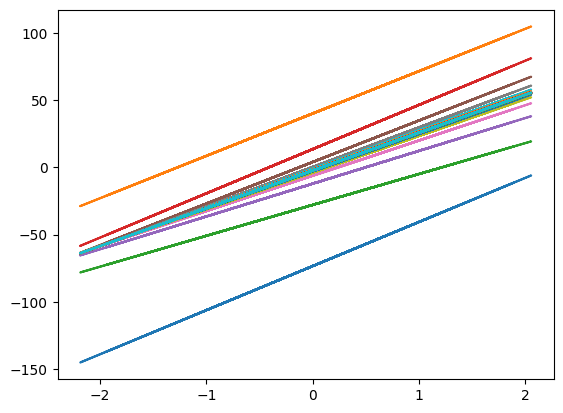

In [20]:
gd=GDRegressor(learning_rate=0.01,epochs=100)#this is constructor so we can call it direct at a time of object creation
gd.fit(X_train,Y_train)
Y_pred=gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)
